In [1]:
gap('LoadPackage("numericalsgps")')

true

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string

def get_corner(psfrobenius,dim):
    lup = []
    for i in range(len(psfrobenius[0])):
        m = max([item[i] for item in psfrobenius])
        lup.append(m)
    c = list(map(lambda i, j: i + j, lup, [1]*dim))
    return c

def draw_sng_3D(sng,kward,dim):
    foo = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 6)) + '.png'
    gaps = [list(u) for u in gap(f'Gaps({sng})')]
    psfrob = [list(u) for u in gap(f'PseudoFrobenius({sng})')]
    corner = [int(u) for u in get_corner(psfrob,dim)]
    drawing_square = max(corner) + 2
    if dim == 3:
        x,y,z = zip(*gaps)
        x = [int(n) for n in x]
        y = [int(n) for n in y]
        z = [int(n) for n in z]
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        n1 = np.linspace(0, drawing_square, drawing_square+1)
        x1 = np.linspace(0,corner[0], corner[0]+1)
        y1 = np.linspace(0,corner[1], corner[1]+1)
        z1 = np.linspace(0,corner[2], corner[2]+1)
        x_1, y_1, z_1= np.meshgrid(x1, y1, z1, indexing='ij')
        ax.scatter3D(x_1,y_1,z_1,".k",color="gray")
        plt.xticks(n1)
        plt.yticks(n1)
        ax.set_zticks(n1)
        plt.margins(x=0,y=0)
        ax.plot(x,y,z,marker="o", markeredgecolor="red", markerfacecolor="red",linestyle="None")
    if dim == 2:
        x,y = zip(*gaps)
        x = [int(u) for u in x]
        y = [int(u) for u in y]
        fig = plt.figure()
        ax = fig.add_subplot(111)
        n1 = np.linspace(0, drawing_square, drawing_square+1)
        m1 = np.linspace(0, drawing_square,drawing_square +1)
        x1 = np.linspace(0,corner[0], corner[0]+1)
        y1 = np.linspace(0,corner[1], corner[1]+1)
        n_1, m_1 = np.meshgrid(n1,m1)
        x_1, y_1 = np.meshgrid(x1, y1)
        plt.plot(n_1,m_1,".k",clip_on=False,alpha=0)
        plt.plot(x_1,y_1,".k",clip_on=False)
        plt.xticks(n1)
        plt.yticks(m1)
        plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
        plt.margins(x=0,y=0)
        plt.plot(x,y,marker="o", markeredgecolor="red", markerfacecolor="white",clip_on=False,linestyle="None")
        rectangle = plt.Rectangle((0,0), corner[0], corner[1], fc='blue',ec="red",alpha=0.2)
        plt.gca().add_patch(rectangle)
        ax.spines['bottom'].set(color = 'green', linestyle = '--', linewidth = 0.5)
        for axis in ['top', 'right','left']:
            ax.spines[axis].set_visible(False)
    if kward == 1:
        plt.savefig(foo)

In [37]:
def get_maximal_leq(gaps):
    def leq(vector_a,vector_b):
        if len(vector_a) != len(vector_b):
            raise ValueError("Los vectores deben tener la misma dimensión")
        for a, b in zip(vector_a, vector_b):
            if a > b:
                return False
        return True
    
    Ps = Poset(DiGraph(met(gaps,leq)))
    return Ps.maximal_elements()

def draw_sng_maximales(sng,kward,dim):
    foo = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 6)) + '.png'
    gaps = [list(u) for u in gap(f'Gaps({sng})')]
    maximal_gaps = get_maximal_leq(gaps)
    psfrob = [list(u) for u in gap(f'PseudoFrobenius({sng})')]
    corner = [int(u) for u in get_corner(psfrob,dim)]
    drawing_square = max(corner) + 2
    if dim == 3:
        x,y,z = zip(*gaps)
        x_m,y_m,z_m, = zip(*maximal_gaps)
        x = [int(n) for n in x]
        y = [int(n) for n in y]
        z = [int(n) for n in z]
        x_m = [int(n) for n in x_m]
        y_m = [int(n) for n in y_m]
        z_m = [int(n) for n in z_m]
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        n1 = np.linspace(0, drawing_square, drawing_square+1)
        x1 = np.linspace(0,corner[0], corner[0]+1)
        y1 = np.linspace(0,corner[1], corner[1]+1)
        z1 = np.linspace(0,corner[2], corner[2]+1)
        x_1, y_1, z_1= np.meshgrid(x1, y1, z1, indexing='ij')
        ax.scatter3D(x_1,y_1,z_1,".k",color="gray")
        plt.xticks(n1)
        plt.yticks(n1)
        ax.set_zticks(n1)
        plt.margins(x=0,y=0)
        ax.plot(x,y,z,marker="o", markeredgecolor="red", markerfacecolor="red",linestyle="None")
        ax.plot(x_m,y_m,z_m,marker="o", markeredgecolor="green", markerfacecolor="green",linestyle="None")
    if dim == 2:
        x,y = zip(*gaps)
        x_m,y_m = zip(*maximal_gaps)
        x = [int(n) for n in x]
        y = [int(n) for n in y]
        x_m = [int(n) for n in x_m]
        y_m = [int(n) for n in y_m]
        fig = plt.figure()
        ax = fig.add_subplot(111)
        n1 = np.linspace(0, drawing_square, drawing_square+1)
        m1 = np.linspace(0, drawing_square,drawing_square +1)
        x1 = np.linspace(0,corner[0], corner[0]+1)
        y1 = np.linspace(0,corner[1], corner[1]+1)
        n_1, m_1 = np.meshgrid(n1,m1)
        x_1, y_1 = np.meshgrid(x1, y1)
        plt.plot(n_1,m_1,".k",clip_on=False,alpha=0)
        plt.plot(x_1,y_1,".k",clip_on=False)
        plt.xticks(n1)
        plt.yticks(m1)
        plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
        plt.margins(x=0,y=0)
        plt.plot(x,y,marker="o", markeredgecolor="red", markerfacecolor="white",clip_on=False,linestyle="None")
        plt.plot(x_m,y_m,marker="o", markeredgecolor="green", markerfacecolor="green",clip_on=False,linestyle="None")
        rectangle = plt.Rectangle((0,0), corner[0], corner[1], fc='blue',ec="red",alpha=0.2)
        plt.gca().add_patch(rectangle)
        ax.spines['bottom'].set(color = 'green', linestyle = '--', linewidth = 0.5)
        for axis in ['top', 'right','left']:
            ax.spines[axis].set_visible(False)
    if kward == 1:
        plt.savefig(foo)

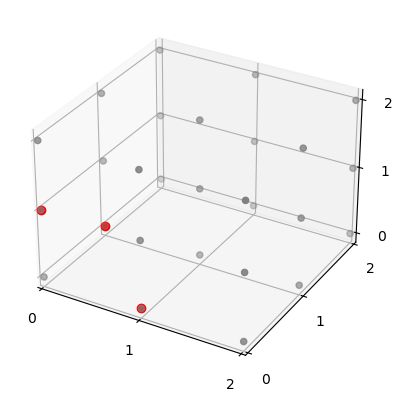

In [27]:
draw_sng_3D("AffineSemigroupByGaps([[1,0,0],[0,1,0],[0,0,1]])",0,3)
#Este comando genera la Figura 2.2

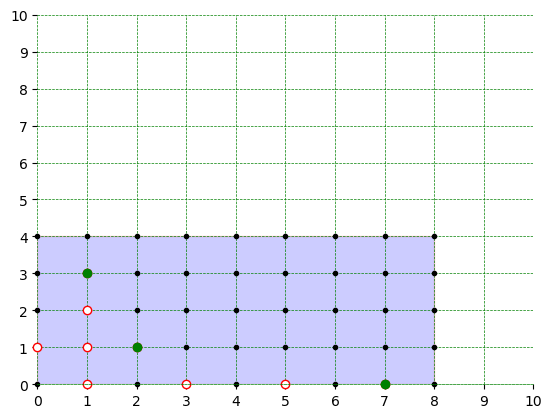

In [47]:
draw_sng_maximales("AffineSemigroupByGaps([[0, 1], [1, 0], [1, 1], [1, 2], [1, 3], [2, 1], [3, 0], [5, 0], [7, 0]])",1,2)

In [22]:
import itertools
def apery_set_sng(sng,rev,poi,dim):
    ap_1 = list(itertools.product(range(int(rev + 1)),repeat=int(dim)))
    gap_list = gap(f'Gaps({sng})')
    ap_1 = [list(u) for u in ap_1 if u not in gap_list]
    kus = []
    for i in ap_1:
        kx = list(map(lambda i, j: i - j, i, poi))
        if str(gap(f'{kx} in {sng}')) == 'false':
            kus.append(i)
    return gap(kus)

In [23]:
sng_3d = 'AffineSemigroupByGaps([[1,0,0],[0,1,0],[0,0,1]])'
apery_set_sng(sng_3d,5,[0,0,1],3)

[ [ 0, 0, 0 ], [ 0, 0, 2 ], [ 0, 1, 1 ], [ 0, 2, 0 ], [ 0, 3, 0 ], 
  [ 0, 4, 0 ], [ 0, 5, 0 ], [ 1, 0, 1 ], [ 1, 1, 0 ], [ 1, 2, 0 ], 
  [ 1, 3, 0 ], [ 1, 4, 0 ], [ 1, 5, 0 ], [ 2, 0, 0 ], [ 2, 1, 0 ], 
  [ 2, 2, 0 ], [ 2, 3, 0 ], [ 2, 4, 0 ], [ 2, 5, 0 ], [ 3, 0, 0 ], 
  [ 3, 1, 0 ], [ 3, 2, 0 ], [ 3, 3, 0 ], [ 3, 4, 0 ], [ 3, 5, 0 ], 
  [ 4, 0, 0 ], [ 4, 1, 0 ], [ 4, 2, 0 ], [ 4, 3, 0 ], [ 4, 4, 0 ], 
  [ 4, 5, 0 ], [ 5, 0, 0 ], [ 5, 1, 0 ], [ 5, 2, 0 ], [ 5, 3, 0 ], 
  [ 5, 4, 0 ], [ 5, 5, 0 ] ]

In [44]:
def met(Lista,comp):
    k = []
    for i in Lista:
        aa = []
        Lz = [u for u in Lista if u != i]
        for j in Lz:
            if comp(i,j) == 1:
                aa.append(j)
        b = [i,aa]
        k.append(b)
    return {gap(u[0]): gap(v[1]) for (u,v) in zip(k,k)}

def set_subs(a,b):
    return list(map(lambda i, j: i - j, a, b))

def max_leqs(Lista, Set):
    def leqs_int(a,b):
        c = set_subs(b,a)
        if gap(f'{c} in {Set}'):
            return 1
        return -1
    Ps = Poset(DiGraph(met(Lista,leqs_int)))
    return Ps.maximal_elements()

In [45]:
sng = 'AffineSemigroupByGaps([[1,0,0],[0,1,0],[0,0,1]])'
print(max_leqs(apery_set_sng(sng,5,[0,0,1],3),sng))
print(gap(f'SpecialGaps({sng})'))

[[ 0, 0, 2 ], [ 0, 1, 1 ], [ 1, 0, 1 ], [ 4, 5, 0 ], [ 5, 5, 0 ], [ 5, 4, 0 ]]
[ [ 0, 0, 1 ], [ 0, 1, 0 ], [ 1, 0, 0 ] ]


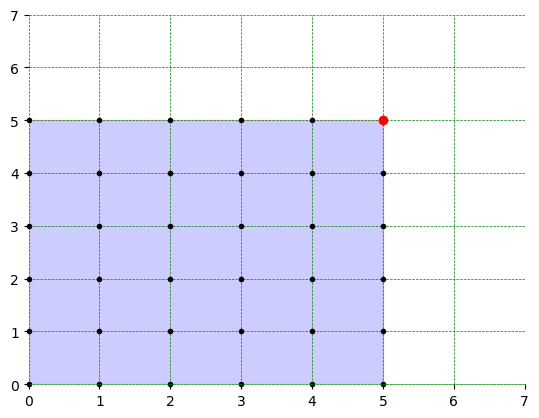

In [51]:
def dibujar_pi_h(h,kward):
    foo = ''.join(random.choices(string.ascii_uppercase + string.digits, k = 6)) + '.png'
    fig = plt.figure()
    ax = fig.add_subplot(111)
    draw_square = max(h) + 2
    n1 = np.linspace(0, draw_square,  draw_square+1)
    x1 = np.linspace(0, h[0], h[0]+1)
    y1 = np.linspace(0, h[1], h[1]+1)
    n_1, m_1 = np.meshgrid(n1, n1)
    x_1, y_1 = np.meshgrid(x1, y1)
    plt.plot(n_1,m_1,".k",clip_on=False,alpha=0)
    plt.plot(x_1,y_1,".k",clip_on=False)
    plt.xticks(n1)
    plt.yticks(n1)
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.margins(x=0,y=0)
    plt.plot(h[0],h[1],marker="o", markeredgecolor="red", markerfacecolor="red",clip_on=False,linestyle="None")
    rectangle = plt.Rectangle((0,0), h[0], h[1], fc='blue',ec="red",alpha=0.2)
    plt.gca().add_patch(rectangle)
    ax.spines['bottom'].set(color = 'green', linestyle = '--', linewidth = 0.5)
    for axis in ['top', 'right','left']:
        ax.spines[axis].set_visible(False)
    if kward == 1:
        plt.savefig(foo)
dibujar_pi_h([5,5],1)